# Decision Tree

* Você pode baixar o dataset em https://archive.ics.uci.edu/ml/datasets/Car+Evaluation.

In [1]:
import os
import pandas as pd
import math
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
headers = ["buying", "maint", "doors", "persons","lug_boot", "safety", "class"]
data = pd.read_csv("carData.csv", header=None, names=headers)

data = data.take(np.random.permutation(len(data)))
#data.sample(frac=1).reset_index(drop=true) #shuffle (Felipe)

No código acima, faremos a leitura do arquivo, informando que não há cabeçário (obrigatório) e a nossa coluna 6 (0-6) representa a label

In [3]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
583,high,high,3,4,big,med,acc
508,high,vhigh,4,more,med,med,unacc
1098,med,med,2,more,small,low,unacc
680,high,med,3,2,med,high,unacc
795,high,low,3,4,med,low,unacc


In [4]:
data.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

O problema é que nossos dados categóricos são strings. Então precisamos converter em representantes numéricos para aplicarmos no algoritmo

In [5]:
for h in headers:
    data[h] = data[h].astype('category')
    data[h] = data[h].cat.codes

data.set_index("class", inplace=True)
data.head()

,buying,maint,doors,persons,lug_boot,safety
class,,,,,,
0,0,0,1,1,0,2
2,0,3,2,2,1,2
2,2,2,0,2,2,1
2,0,2,1,0,1,0
2,0,1,1,1,1,1


Faremos a separação dos dados em conjunto de treino e teste

In [6]:
size = len(data)
trainSize = int(math.floor(size * 0.7))
trainData = data[:trainSize]
testData = data[trainSize:]


### Agora ok!
Vamos ao que interessa...

In [7]:
dTree = DecisionTreeClassifier(criterion="entropy")
dTree.fit(trainData.ix[:,0:6], trainData.index)

/home/mnery/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
dTree.predict(testData.ix[:, 0:6])
dTree.score(testData.ix[:, 0:6], testData.index)



/home/mnery/miniconda3/envs/ds/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.96146435452793833

### Atividades

1. Utilizamos a medida de Entropia como fator de decisão (medida de impureza de um nó). Teste o mesmo conjunto 
randômico de dados para a medida Gini e compare os resultados.
Ref1.: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
Ref2.: https://en.wikipedia.org/wiki/Decision_tree_learning

2. Aplique Decision Tree em outro dataset (link abaixo) e analise os resultados. Procure identificar (se há) relações entre as features (correlacionadas, por exemplo) e faça testes eliminando as que você achar desnecessárias, de forma a tentar melhorar seu classificador, seja em predição ou perfomance.
Dataset: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

3. Execute a função abaixo para gerar a árvore que representa seu classificador (ambos utilizando entropia e gini como medidas). Analise a saida, entendendo como ela foi criada e os seus respectivos valores em relação a medida utilizada. Reflexão: seria possível construir nosso classificador apenas utilizando a estrutura condicional if-else?




In [9]:
def visualize_tree(tree, feature_names):
    """Cria png que representa a arvore gerada.

    Args
    ----
    tree -- DecsisionTree.
    feature_names -- vetor com os nomes das features.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Nao foi possivel gerar a arvore.")
        

In [10]:
rf = []
for i in range(1,100):
    d_tree = RandomForestClassifier(n_estimators=i, criterion='gini')
    d_tree.fit(trainData, trainData.index)
    d_tree.predict(testData.iloc[:, 0:6])
    rf.append(d_tree.score(testData, testData.index))

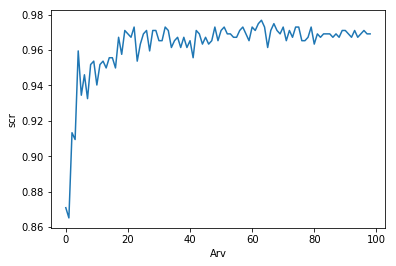

In [11]:
plt.plot(rf)
plt.xlabel('Arv')
plt.ylabel('scr')
plt.show()

In [12]:
print(rf[np.argmax(rf)])
print(np.argmax(rf))

0.976878612717
63
